# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-yusv9bab/tensorflow-gpu_3194e29810b84078867cb5b497cb8508/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running

In [2]:
!pip list

Package                       Version
----------------------------- -------------------
absl-py                       1.0.0
aio-pika                      8.3.0
aiofiles                      22.1.0
aiogram                       2.23.1
aiohttp                       3.8.4
aiormq                        6.6.4
aiosignal                     1.3.1
alembic                       1.7.7
altair                        4.2.0
aniso8601                     9.0.1
anyio                         3.6.1
APScheduler                   3.9.1.post1
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
astor                         0.8.1
astroid                       2.4.2
asttokens                     2.0.8
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
attrs                         22.1.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backtrader                    1.9.76.1

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-07-17 18:59:48.735273: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-07-17 18:59:48.735316: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Kishore): /proc/driver/nvidia/version does not exist


In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


2023-07-17 19:00:00.822572: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

2023-07-17 19:00:03.114706: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 29353122 exceeds 10% of free system memory.
2023-07-17 19:00:03.234591: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 63078912 exceeds 10% of free system memory.
2023-07-17 19:00:03.431790: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 59101500 exceeds 10% of free system memory.
2023-07-17 19:00:03.588521: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 52469736 exceeds 10% of free system memory.
2023-07-17 19:00:03.596048: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 59557698 exceeds 10% of free system memory.


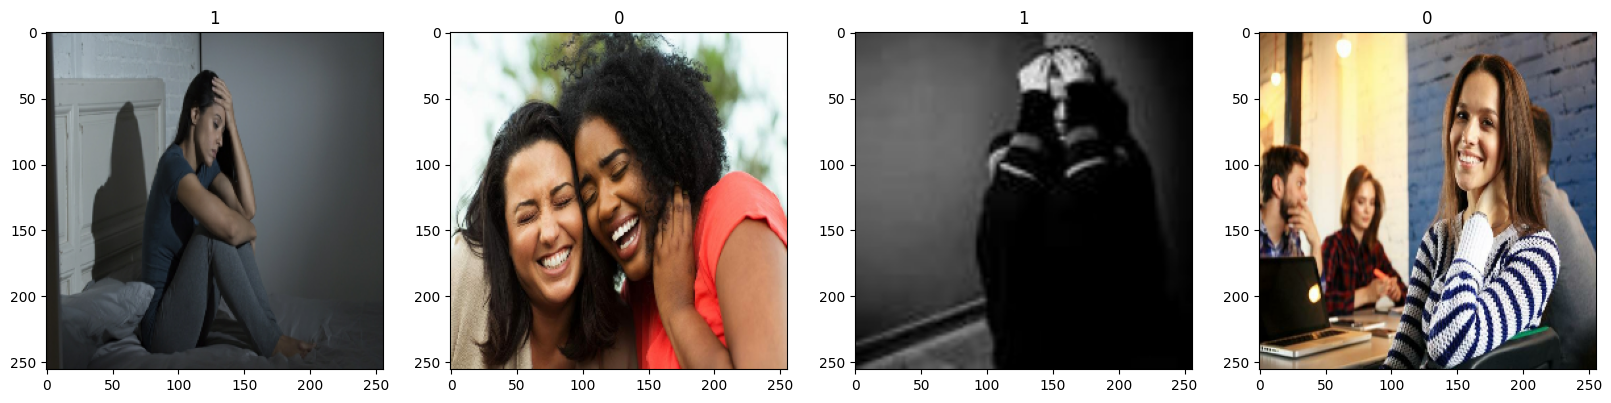

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.13359399, 0.12182929, 0.10222144],
          [0.13319331, 0.12830882, 0.11294352],
          [0.16580236, 0.16580236, 0.16473246],
          ...,
          [0.21769828, 0.22161984, 0.22946298],
          [0.21458334, 0.2185049 , 0.22634804],
          [0.21428438, 0.21820594, 0.22604908]],
 
         [[0.13269138, 0.12156863, 0.10196079],
          [0.13457629, 0.12830882, 0.10933886],
          [0.16182287, 0.16546056, 0.15996525],
          ...,
          [0.21752451, 0.22144608, 0.22928922],
          [0.21650918, 0.22043075, 0.22827388],
          [0.21518841, 0.21910998, 0.22695312]],
 
         [[0.13293265, 0.12156863, 0.10196079],
          [0.14195724, 0.13019253, 0.11058469],
          [0.15924479, 0.16341145, 0.15765165],
          ...,
          [0.21668796, 0.22060953, 0.22845267],
          [0.21782322, 0.22174479, 0.22958793],
          [0.21745558, 0.22137715, 0.22922029]],
 
         ...,
 
         [[0.11958367, 0.10781896, 0.08821112],
          [0.12488

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

7

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 20s 1s/step - loss: 1.0906 - accuracy: 0.4955 - val_loss: 0.6988 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 13s 1s/step - loss: 0.6807 - accuracy: 0.5268 - val_loss: 0.6006 - val_accuracy: 0.6094
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.5928 - accuracy: 0.6875 - val_loss: 0.4412 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 13s 2s/step - loss: 0.4648 - accuracy: 0.8348 - val_loss: 0.4010 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 0.3599 - accuracy: 0.8929 - val_loss: 0.2197 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.2980 - accuracy: 0.8795 - val_loss: 0.2795 - val_accuracy: 0.8438
Epoch 7/20
7/7 [==============================] - 8s 944ms/step - loss: 0.2372 - accuracy: 0.9241 - val_loss: 0.2154 - val_accuracy: 0.9062
Epoch 8/20
7/7 [==================

# 8. Plot Performance

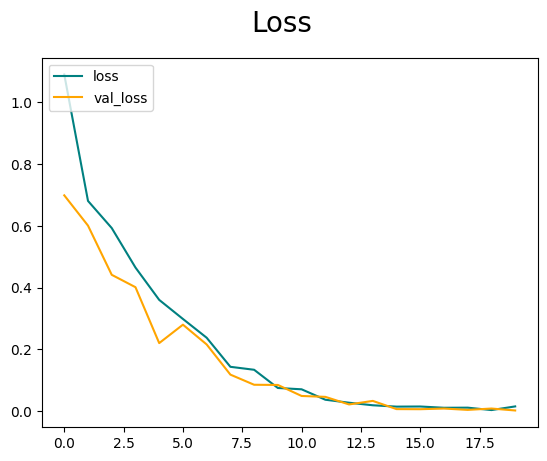

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

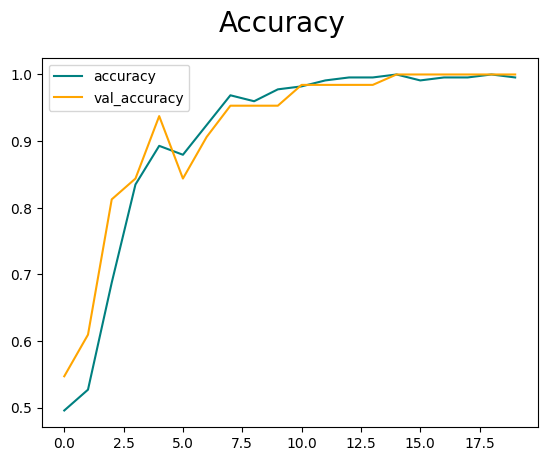

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


# 10. Test

In [35]:
import cv2

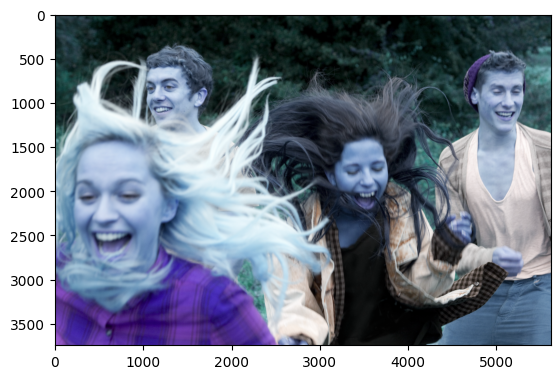

In [36]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

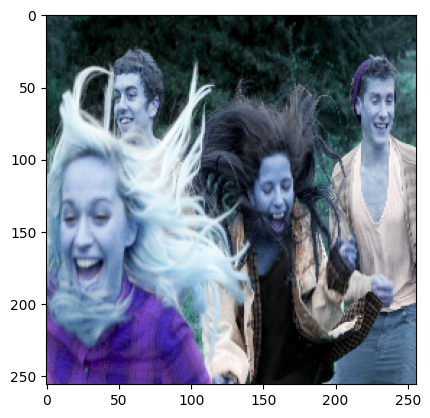

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [39]:
yhat

array([[0.02298698]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','imageclassifier.h5'))

In [44]:
new_model = load_model('models/imageclassifier.h5')

In [45]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.02298698]], dtype=float32)